#### 단순 선형 회귀 실습
- 데이터셋 : Salary_Data.csv
    - 두 개의 컬럼. 하나는 근무기간(독립변수, 입력값, x축좌표값), 두번째는 급여액(종속변수, 정답, y축좌표값)
    - 내 근무 년수를 입력했을 때 예상되는 급여액을 구하시오.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [4]:
df.shape

(30, 2)

In [10]:
# 독립변수 - 근무 기간
X = df.iloc[:,:1].values # 대괄호 안에 콤마를 기준으로 앞에는 행, 뒤에는 열 입니다.
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [8]:
#종속변수
y = df.iloc[:,1].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [12]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [11]:
type(y)

numpy.ndarray

In [13]:
list(y)

[np.float64(39343.0),
 np.float64(46205.0),
 np.float64(37731.0),
 np.float64(43525.0),
 np.float64(39891.0),
 np.float64(56642.0),
 np.float64(60150.0),
 np.float64(54445.0),
 np.float64(64445.0),
 np.float64(57189.0),
 np.float64(63218.0),
 np.float64(55794.0),
 np.float64(56957.0),
 np.float64(57081.0),
 np.float64(61111.0),
 np.float64(67938.0),
 np.float64(66029.0),
 np.float64(83088.0),
 np.float64(81363.0),
 np.float64(93940.0),
 np.float64(91738.0),
 np.float64(98273.0),
 np.float64(101302.0),
 np.float64(113812.0),
 np.float64(109431.0),
 np.float64(105582.0),
 np.float64(116969.0),
 np.float64(112635.0),
 np.float64(122391.0),
 np.float64(121872.0)]

In [ ]:
# 훈련데이터와 테스트 데이터 분리하는 코드 작성하시오.
# 비율은 7대 3으로 하시오.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=3/10, random_state=42)
print(f"X_train : {X_train}, X_test : {X_test}, y_train : {y_train}, y_test : {y_test}")
# X_train 과 y_train -  훈련에 사용되는 데이터이다.
# X_test 와 y_test - 테스트에 사용되는 데이터 이다.
# 어떤 모델을 활용하여 문제를 해결할 것인가? 회귀 문제 인가, 분류 문제 인가
# 근무 년수를 가지고 급여액을 예측하기
# 훈련 데이터로 fit함수로 훈련을 시키고 그리고 X_test 값으로 예측한 결과를 얻어 낸다.

X_train : [[ 1.1]
 [ 2.2]
 [ 5.1]
 [ 2.9]
 [ 4.1]
 [ 4. ]
 [ 7.9]
 [ 1.3]
 [ 1.5]
 [ 9. ]
 [ 2. ]
 [ 7.1]
 [ 9.5]
 [ 5.9]
 [10.5]
 [ 6.8]
 [ 3.2]
 [ 3.9]
 [ 4.5]
 [ 6. ]
 [ 3. ]], X_test : [[ 9.6]
 [ 4.9]
 [ 8.2]
 [ 5.3]
 [ 3.2]
 [ 3.7]
 [10.3]
 [ 8.7]
 [ 4. ]], y_train : [ 39343.  39891.  66029.  56642.  57081.  55794. 101302.  46205.  37731.
 105582.  43525.  98273. 116969.  81363. 121872.  91738.  54445.  63218.
  61111.  93940.  60150.], y_test : [112635.  67938. 113812.  83088.  64445.  57189. 122391. 109431.  56957.]


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # 단순 선형회귀에 대한 알고리즘이 구현된 객체 생성
# 객체를 생성한 것으로 기울기와 y절편을 구할 수 있다.
# 경사하강법과 최소제곱법을 사용하여 손실을 최소화 하는 일차함수를 구할 수   있다.
model.fit(X_train, y_train) # X_train 입력값이고 y_train은 정답이다.(70%-30개중에서 21개 훈련을 함.)

LinearRegression()

In [ ]:
# X_test에서 추출된 9개의 값을 가지고  예측한 급여액을 출력해 보기
# X_test 의 값은 근무 년수 이고 , y_test값은 실제 받은 급여액이다.
y_pred = model.predict(X_test) # 훈련데이터가 아니라 테스트 데이터로 예측을 한다.
print(y_pred) #전체 30개의 값 중에서 임의로 30%해당하는 9개를 담아둔 X_test입력하여 예측한 급여액이다.

[115573.62288352  71679.93878159 102498.90847018  75415.57147111
  55803.4998511   60473.04071301 122110.98009019 107168.44933209
  63274.76523015]


In [18]:
print(y_test)

[112635.  67938. 113812.  83088.  64445.  57189. 122391. 109431.  56957.]


In [19]:
# 데이터가 많으면 하나하나 일일이 비교하기 불편하므로 2차 배열 만들어서 
# 비교하기 쉽도록 처리해 본다.   
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[115573.62 112635.  ]
 [ 71679.94  67938.  ]
 [102498.91 113812.  ]
 [ 75415.57  83088.  ]
 [ 55803.5   64445.  ]
 [ 60473.04  57189.  ]
 [122110.98 122391.  ]
 [107168.45 109431.  ]
 [ 63274.77  56957.  ]]


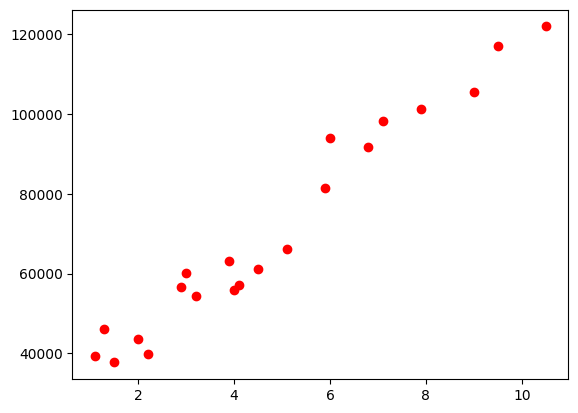

In [20]:
plt.scatter(X_train, y_train, color="red")

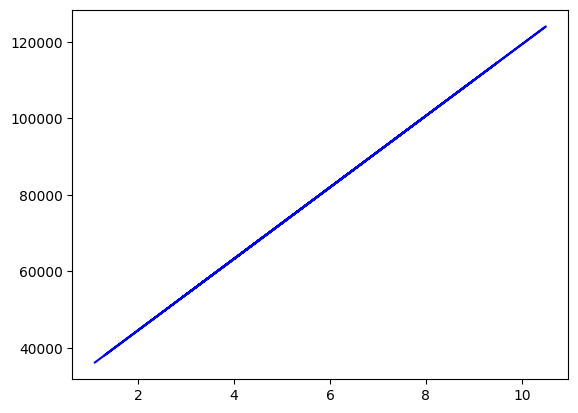

In [21]:
plt.plot(X_train, model.predict(X_train), color="blue")

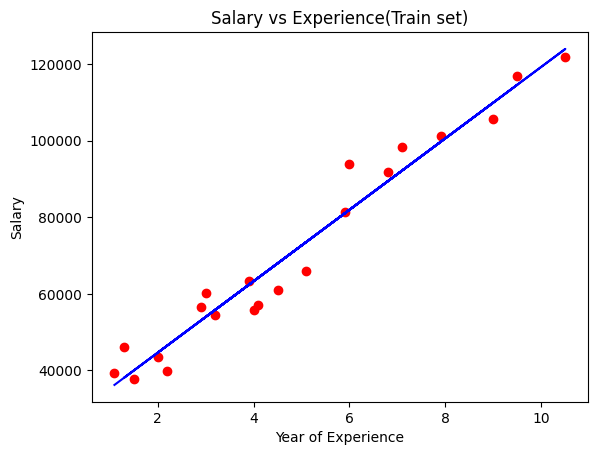

In [22]:
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, model.predict(X_train), color="blue")
plt.title("Salary vs Experience(Train set)")
plt.xlabel("Year of Experience")
plt.ylabel("Salary")
plt.show()

모델 평가 지표      
- 평균 제곱 오차(MSE) : 예측값과 실제값 차이 제곱의 평균       
- 결정 계수(R제곱승) : 모델이 실제 데이터를 얼마나 잘 설명하고 있나 1에 가까울 수록 설명력이 높다.       
설명력은 독립변수들이 종속변수의 변화를 설명하는 정도를 말함     
R2제곱승 값이 0.9라면 전체 데이터의 변동성 중에 90%모델이 설명할 수 있다는 의미임.      
R2제곱승 값이 1에 가까울 수록 모델이 종속 변수의 변동성을 거의 모두 설명하고 있다는 것을 의미함.      

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE : {mse: .4f}")
print(f"R2제곱승 : {r2: .4f}")


MSE :  37784662.4662
R2제곱승 :  0.9414
